# Real Estate Sales Analysis (2001–2022)

## Project Overview

This notebook presents an **Exploratory Data Analysis (EDA)** on the *Real Estate Sales from 2001 to 2022* dataset, with the primary objective of understanding the factors influencing property sale prices. The analysis focuses on uncovering **patterns, trends, and relationships** within the dataset to prepare it for future machine learning modeling (e.g., regression).

### Main Objectives:

#### **Data Cleaning**  
  Remove missing values, detect and handle duplicates, and standardize formats (e.g., date).

#### **Feature Exploration**  
  - Examine how **towns and regions** affect prices.  
  - Explore the influence of **property type**, **residential type**, and **floor area** on sale prices.

#### **Temporal Analysis**  
  Analyze how prices have changed over time using the **Date of Sale** column.

#### **Univariate and Bivariate Analysis**  
  - Visualize the distribution of numerical variables such as **Floor Area (sqm)** and **Price**.  
  - Use **bar plots** and **boxplots** to compare prices across categorical variables.

#### **Outlier Detection**  
  Identify unusual **price** or **floor area** values that could skew model performance.

#### **Correlation Check**  
  Investigate relationships between numerical variables to identify potential predictors for modeling.


In [ ]:
# EXPLORATORY DATA ANALYSIS
# Business Goals: Understand patterns in property sales & prepare for modeling

In [1]:
# 1. IMPORT LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import re

In [2]:
# 2. LOAD DATA 

df= pd.read_csv(r'C:\Users\userr\OneDrive\Desktop\Data not yet done\Real_Estate_Sales_2001-2022_GL.csv', low_memory=False)
print("Shape of dataset:", df.shape)
df.head()

Shape of dataset: (1097629, 14)


,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020177,2020,04/14/2021,Ansonia,323 BEAVER ST,133000.0,248400.0,0.5354,Residential,Single Family,NaN,NaN,NaN,POINT (-73.06822 41.35014)
1,2020225,2020,05/26/2021,Ansonia,152 JACKSON ST,110500.0,239900.0,0.4606,Residential,Three Family,NaN,NaN,NaN,NaN
2,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,NaN,NaN,NaN,NaN,NaN
3,2020090,2020,12/14/2020,Ansonia,57 PLATT ST,127400.0,202500.0,0.6291,Residential,Two Family,NaN,NaN,NaN,NaN
4,210288,2021,06/20/2022,Avon,12 BYRON DRIVE,179990.0,362500.0,0.4965,Residential,Condo,NaN,NaN,NaN,POINT (-72.879115982 41.773452988)


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1097629 entries, 0 to 1097628
Data columns (total 12 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   Serial Number     1097629 non-null  int64         
 1   List Year         1097629 non-null  int64         
 2   Date Recorded     1097627 non-null  datetime64[ns]
 3   Town              1097629 non-null  object        
 4   Address           1097578 non-null  object        
 5   Assessed Value    1097629 non-null  float64       
 6   Sale Amount       1097629 non-null  float64       
 7   Sales Ratio       1097629 non-null  float64       
 8   Property Type     715183 non-null   object        
 9   Residential Type  699240 non-null   object        
 10  Latitude          298111 non-null   float64       
 11  Longitude         298111 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(4)
memory usage: 100.5+ MB


In [3]:
# 3. CLEAN & TRANSFORM 
# Convert Date Recorded to datetime

df["Date Recorded"] = pd.to_datetime(df["Date Recorded"], errors='coerce')

In [5]:
# Drop irrelevant columns with too many NaNs

columns_to_drop = ["Non Use Code", "Assessor Remarks", "OPM remarks"]
df.drop(columns=columns_to_drop, inplace=True)

In [6]:
# Split Location into latitude and longitude

def extract_lat_lon(point):
    if isinstance(point, str):
        match = re.findall(r"[-+]?[0-9]*\.?[0-9]+", point)
        if len(match) == 2:
            return float(match[1]), float(match[0])
    return np.nan, np.nan

In [7]:
lat_lon = df["Location"].apply(lambda x: extract_lat_lon(x))
df["Latitude"] = lat_lon.apply(lambda x: x[0])
df["Longitude"] = lat_lon.apply(lambda x: x[1])
df.drop(columns=["Location"], inplace=True)

In [12]:
# Handle missing values (initial overview)

df.isnull().mean().sort_values(ascending=False)

Latitude            0.728405
Longitude           0.728405
Residential Type    0.362954
Property Type       0.348429
Address             0.000046
Date Recorded       0.000002
Serial Number       0.000000
List Year           0.000000
Town                0.000000
Assessed Value      0.000000
Sale Amount         0.000000
Sales Ratio         0.000000
dtype: float64

In [15]:
df["Sale Amount"].describe()

count    1.097629e+06
mean     4.053146e+05
std      5.143492e+06
min      0.000000e+00
25%      1.450000e+05
50%      2.330000e+05
75%      3.750000e+05
max      5.000000e+09
Name: Sale Amount, dtype: float64

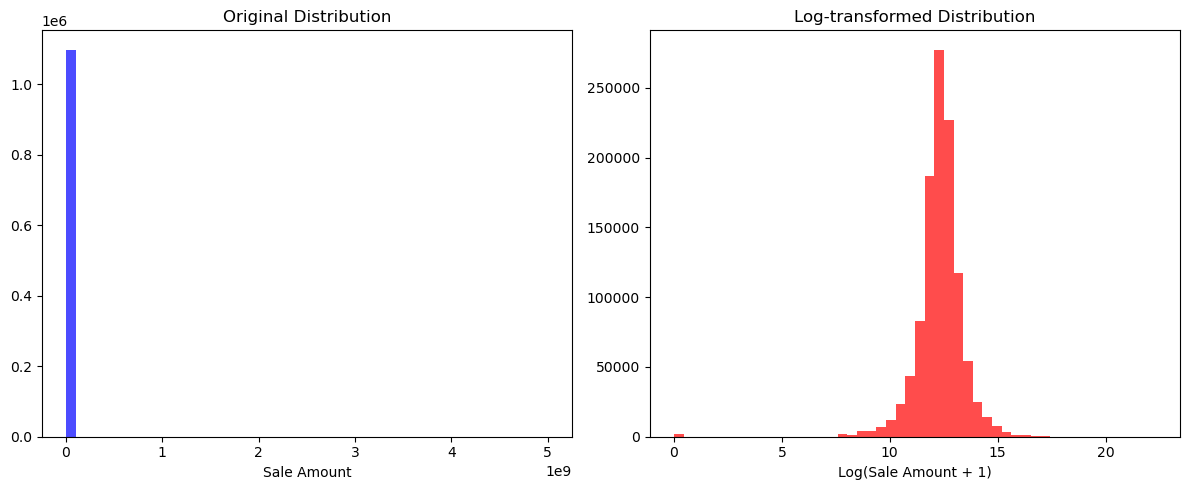

In [26]:
# 4. BASIC EXPLORATION
# Sale Amount Distribution

if df['Sale Amount'].skew() > 2:  # if so skewed
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.hist(df["Sale Amount"], bins=50, alpha=0.7, color='blue')
    plt.title("Original Distribution")
    plt.xlabel("Sale Amount")
    
    plt.subplot(1, 2, 2)
    plt.hist(np.log1p(df["Sale Amount"]), bins=50, alpha=0.7, color='red')
    plt.title("Log-transformed Distribution")
    plt.xlabel("Log(Sale Amount + 1)")
    
    plt.tight_layout()
    plt.show()

## Original Distribution vs Log-Transformed Distribution

### What it Shows:
- **Left Plot (Original Distribution):**
  - The `Sale Amount` data is **highly right-skewed**.
  - Most sales occur at relatively low amounts, with a **long tail of very high-value transactions**.

- **Right Plot (Log-Transformed Distribution):**
  - After applying `log(Sale Amount + 1)`, the distribution becomes more **normal (bell-shaped)**.
  - This transformation helps **satisfy the assumptions of many statistical models**, especially those assuming normally distributed inputs or residuals.

### Insight:
- The original sales data contains **extreme outliers** that distort the scale.
- A **log transformation** reduces the influence of outliers and prepares the data for algorithms like **linear regression** or **OLS**, which assume normally distributed errors.
- **Recommendation**: Use the log-transformed `Sale Amount` in your modeling pipeline.


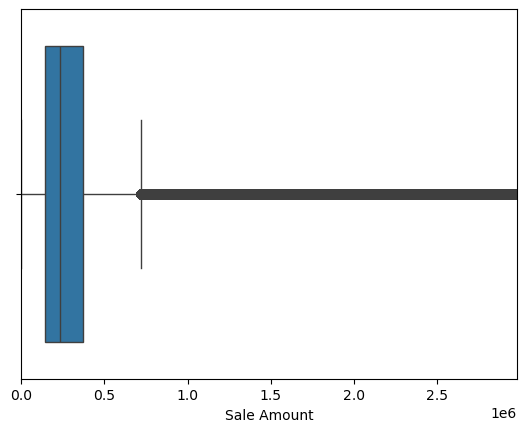

In [28]:
sns.boxplot(x=df["Sale Amount"])
plt.xlim(0, df["Sale Amount"].quantile(0.99))
plt.show()

## Box Plot of Sale Amount

### What it Shows:
- A **boxplot** depicting the `Sale Amount` spread:
  - The **box** captures the interquartile range (middle 50% of values).
  - The **whiskers** show the general range of data.
  - **Dots or extended whiskers** represent **outliers**, mainly high-end property transactions.

### Insight:
- Most property sales are **clustered at lower values**, while a **few high-value transactions** skew the distribution.
- There is a **substantial number of outliers**, indicating very expensive properties.
- **Recommendation**: Before modeling, consider:
  - **Outlier treatment** (e.g., capping, removal),
  - Or using **robust models** like tree-based methods that handle skew and outliers well.

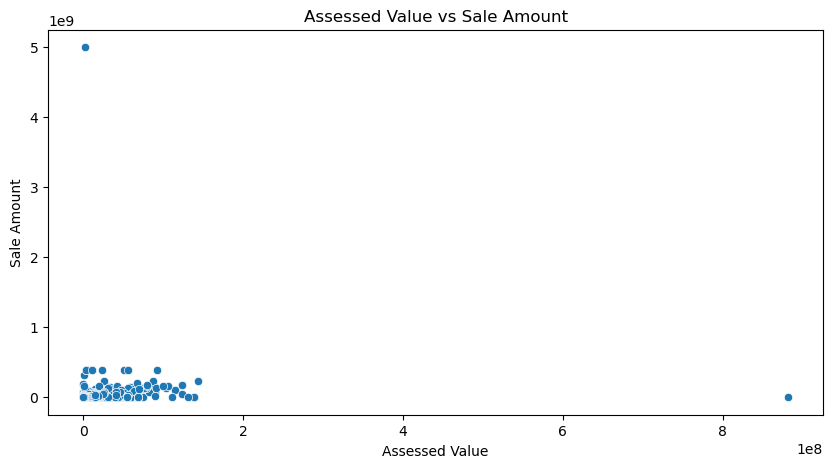

In [19]:
# Sale Amount vs Assessed Value

plt.figure(figsize=(10, 5))
sns.scatterplot(x="Assessed Value", y="Sale Amount", data=df)
plt.title("Assessed Value vs Sale Amount")
plt.xlabel("Assessed Value")
plt.ylabel("Sale Amount")
plt.show()

### Assessed Value vs Sale Amount

#### What the Plot Shows:
- The scatter plot is **heavily clustered in the bottom-left** corner.
- This indicates that **most properties have low assessed values and correspondingly low sale amounts**.
- A few extreme values (outliers) are present, stretching the axes to very high values, which visually compresses the majority of the data.

#### Key Insight:
 The real estate data is highly **right-skewed**, with the majority of transactions involving relatively **low-value properties**, while a small number of **very high-value sales** create distortion in the scale.

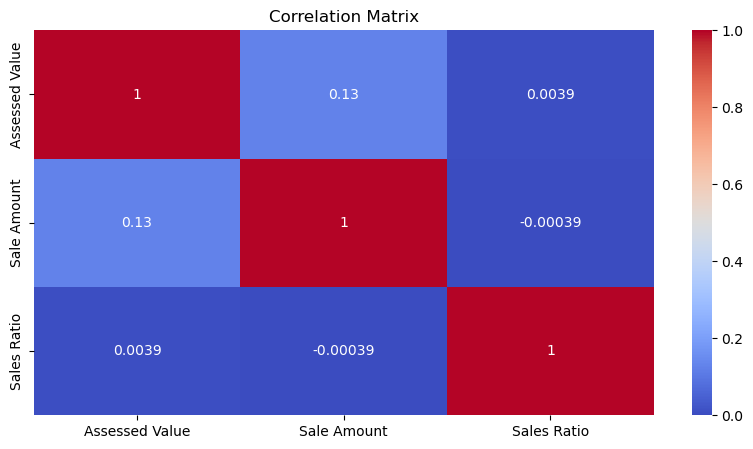

In [23]:
# Correlation Heatmap

plt.figure(figsize=(10, 5))
sns.heatmap(df[["Assessed Value", "Sale Amount", "Sales Ratio"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

### Correlation Matrix Heatmap

#### What the Heatmap Shows:
- This heatmap displays the **Pearson correlation coefficients** between three numerical variables:
  - **Assessed Value**
  - **Sale Amount**
  - **Sales Ratio**

- Correlation values range from **-1** to **+1**:
  - `+1` = perfect positive correlation
  - `-1` = perfect negative correlation
  - `0` = no linear correlation

#### Observations:
- **Assessed Value vs Sale Amount**: correlation = **0.13**
  - This is a **very weak positive correlation**, meaning higher assessed values *slightly* relate to higher sale prices, but the relationship is weak.
  
- **Sale Amount vs Sales Ratio**: correlation ≈ **0.000**
  - **No correlation**, which suggests that sale amount has no predictable relationship with sales ratio in this dataset.
  
- **Assessed Value vs Sales Ratio**: correlation ≈ **0.004**
  - Also **no meaningful correlation**, indicating that assessed value does not help explain variation in the sales ratio.

#### Insight:
The features in the dataset appear to be **mostly uncorrelated**, particularly the `Sales Ratio`, which shows virtually **no linear relationship** with either `Sale Amount` or `Assessed Value`.

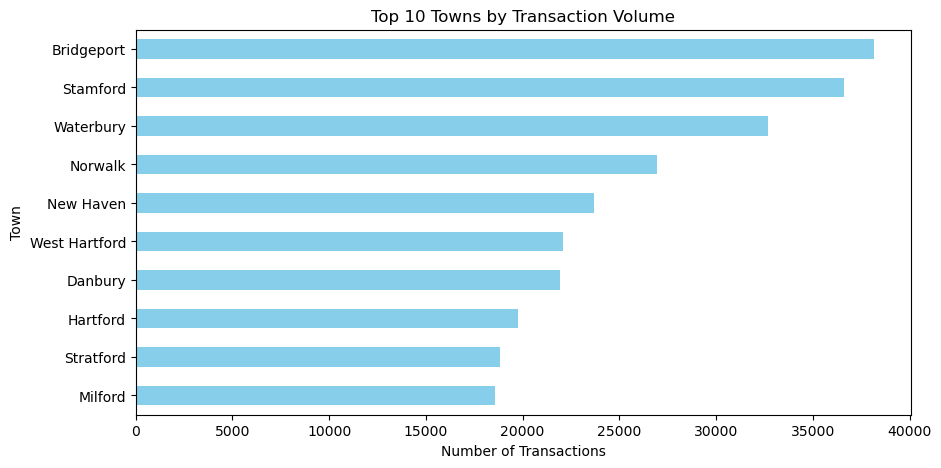

In [27]:
# Top Towns by Number of Transactions

top_towns = df["Town"].value_counts().head(10)
top_towns.plot(kind="barh", figsize=(10,5), color="skyblue")
plt.title("Top 10 Towns by Transaction Volume")
plt.xlabel("Number of Transactions")
plt.gca().invert_yaxis()
plt.show()

### Top 10 Towns by Transaction Volume

#### What the Chart Shows:
This horizontal bar chart displays the **top 10 towns** based on the **number of property transactions**. The data reveals where real estate activity is most concentrated.

#### Observations:
- **Bridgeport** leads with the highest number of transactions, followed closely by **Stamford** and **Waterbury**.
- Other towns with high activity include **Norwalk**, **New Haven**, and **West Hartford**.
- The least among the top 10 is **Milford**, but it still maintains a high relative transaction count.

#### Insight:
The real estate market is **most active in Bridgeport and Stamford**, suggesting these areas may have:
- A larger volume of available properties
- Greater population density or urban development
- Possibly higher housing demand or turnover

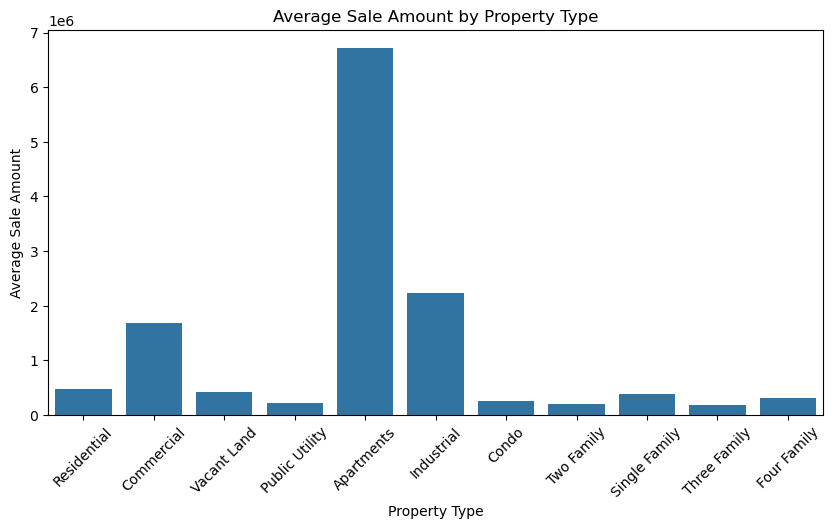

In [34]:
# 5. CATEGORICAL ANALYSIS
# Average Sale Amount by Property Type

plt.figure(figsize=(10,5))
sns.barplot(x="Property Type", y="Sale Amount", data=df, estimator=np.mean, errorbar=None)
plt.title("Average Sale Amount by Property Type")
plt.ylabel("Average Sale Amount")
plt.xticks(rotation=45)
plt.show()

### Average Sale Amount by Property Type

#### What the Chart Shows:
This bar chart presents the **average sale amount** for each **property type**, giving a clear comparison of how different categories of real estate perform in terms of value.

#### Observations:
- **Apartments** have by far the highest average sale amount, reaching nearly $6.7 million, significantly above all other categories.

- **Industrial** and **Commercial** properties follow at a distance, with average sale amounts in the 2 million and $1.7 million range respectively.

- **Residential**, **Single Family**, **Two/Three/ Four Family**, and **Condos** cluster much lower in value, typically under $600,000.

- **Public Utility** properties have the lowest average sale amount.

#### Insight:
The market is **highly segmented by property type**, with **Apartments** standing out as major-value assets, possibly due to being large-scale developments or institutional-grade investments.

Conversely, **residential properties** form the bulk of lower-value, likely high-volume transactions — suitable for consumer/homeowner markets rather than institutional investors.

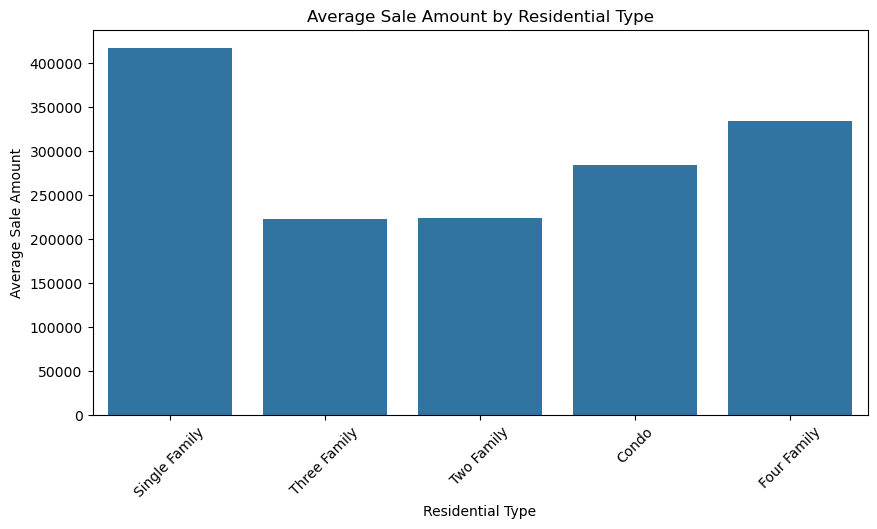

In [19]:
# Average Sale Amount by Residential Type

plt.figure(figsize=(10,5))
sns.barplot(x="Residential Type", y="Sale Amount", data=df, estimator=np.mean, errorbar=None)
plt.title("Average Sale Amount by Residential Type")
plt.ylabel("Average Sale Amount")
plt.xticks(rotation=45)
plt.show()

## Average Sale Amount by Residential Type

- **Single Family** homes have the highest average sale amount among residential property types, exceeding **$400,000**.
  
- **Four Family** and **Condo** properties follow, averaging close to **$300,000**.

- **Three Family** and **Two Family** homes show the lowest average values, around **$225,000**.

## Insight

There is a clear valuation gradient in residential properties:
- **Single Family** homes likely command higher prices due to factors like more land, privacy, or neighborhood appeal.
- **Multi-family** units, such as **Two** and **Three Family** homes, appear to be more affordable options, potentially targeting investors or shared living arrangements.

These trends may inform pricing strategies or investment focus depending on target buyers or rental income goals.


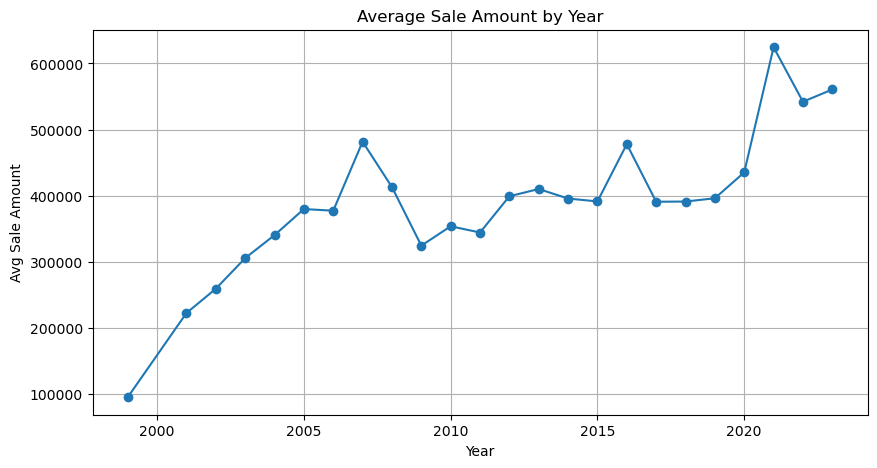

In [53]:
# 6. TIME SERIES TREND 

df["Year"] = df["Date Recorded"].dt.year
yearly_trend = df.groupby("Year")["Sale Amount"].mean()
yearly_trend.plot(marker='o', figsize=(10, 5))
plt.title("Average Sale Amount by Year")
plt.ylabel("Avg Sale Amount")
plt.grid(True)
plt.show()

## Average Sale Amount by Year

- From **1999 to 2007**, there was a consistent and strong upward trend in average sale amounts, peaking around **2007**.
  
- A noticeable **decline occurred between 2008 and 2010**, likely reflecting the global financial crisis and housing market crash.

- Between **2011 and 2019**, the market **stabilized**, fluctuating mildly with average sale amounts hovering around **$400,000**.

- A significant **surge took place in 2021**, with the average sale amount exceeding **$600,000**, possibly due to pandemic-related housing market shifts.

- In **2022–2023**, prices slightly corrected but remained **well above pre-pandemic levels**.

## Insight

The real estate market shows strong sensitivity to macroeconomic events:
- The **2008 crash** had a prolonged impact.
- The **pandemic market boom** in 2021 was dramatic and may have been fueled by low interest rates, supply constraints, and increased demand.
- Long-term trajectory remains **upward**, suggesting resilient market growth despite short-term shocks.


## Next Steps For Modeling

In [32]:
# Ekspor EDA To Modeling
df.to_csv("clean_data.csv", index=False)

## Conclusion 

Based on the exploratory data analysis conducted, several key insights have been uncovered:

- Certain **towns and regions** consistently show higher property prices, suggesting **location** as a critical factor.
- There are visible **price variations** across **property types** and **residential types**, indicating these features should be considered in modeling.
- **Floor area** has a strong **positive correlation** with price, making it a strong candidate as a predictive variable.
- **Sale date trends** suggest **temporal dynamics** in the real estate market, potentially useful for time-based modeling.

## Next Steps for Modeling

Based on the insights gained from this exploratory data analysis (EDA), the following steps are recommended for the next phase — developing predictive models for real estate prices:

1. **Feature Selection & Engineering**  
   - Utilize key variables identified during EDA (e.g., Floor Area, Town, Property Type, Residential Type).
   - Engineer new features such as:
     - Price per square meter
     - Sale year and month to capture temporal trends.

2. **Outlier Treatment**  
   - Address outliers detected in Price and Floor Area to improve model stability and accuracy.

3. **Missing Value Handling**  
   - Apply appropriate imputation techniques to handle missing values systematically.

4. **Model Development**  
   - Begin with a baseline Linear Regression model to establish performance benchmarks.
   - Experiment with more advanced models (e.g., Random Forest, Gradient Boosting) to capture complex relationships.

5. **Evaluation Metrics**  
   - Use R² score and Root Mean Squared Error (RMSE) to evaluate model performance.

6. **Iterative Refinement**  
   - Continuously refine features and models based on validation results to achieve better predictive accuracy.